# Errores

Al ver respuesta temporal, pudimos lograr la descripción de la respuesta transitoria de la señal de salida de un sistema, para ello definimos algunos parámetros que identifican dicha respuesta, como ser $Ts$, $Tr$, $Tp$ y $Mp$. Ahora, nos centraremos en la "parte estacionaria" de la respuesta o salida del sistema, en otras palabras, nos interesa el valor final de la señal de salida luego del transitorio. Para esto, usaremos básicamente dos cosas, por un lado una definición para el error de estado estacionario y por otro lado el teorema del valor final para el cálculo de dicho error.

## Definición importante

Se define la señal de error $E(s)$  el equivalente en el dominio de Laplace de la señal $e(t)$ como:

$$
E(s)= R(s)-Y(s)
$$

para todo sistema donde, $R(s)$ es lo que quiero, es la referencia del sistema o el valor deseado y $Y(s)$ es lo que és, es la salida del sistema o la medición.

## Repaso del uso del Teorema del Valor Final (TVF)

Si todos los polos de $sY(s)$ están en el lado izquierdo de plano $s$, entonces:

$$\lim_{t\rightarrow\infty}y(t)=\lim_{s\rightarrow 0}sY(s)$$

### Ejemplo 1. Uso del teorema

Encontrar el valor final de la señal $y(t)$ cuya transformada de Laplace es $Y(s)=\dfrac{3(s+2)}{s(s^2+2s+10))}$.

Par aver si podemos aplicar el teorema de valor final debemos fijarnos que todos los polos de $sY(s)$ estén en el lado izquierdo de plano $s$.

Esto los podemos hacer:

In [1]:
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
Yaux=ctrl.tf([3,2],[1,2,10]) #es Y(s)*s
Yaux.pole()

array([-1.+3.j, -1.-3.j])

Podemos ver que cumple con las hipótesis del teorema del valor final, entonce resolviendo el límite tenemos que:

$$y(\infty)==\left. sY(s) \right\rvert_{s=0}=\frac{3\cdot 2}{10}=0.6$$

Podemos verificar haciendo la respuesta al impulso, graficándola y viendo el valor final al cual tiende.

In [3]:
Y=ctrl.tf([3,6],[1,2,10,0])
t,y=ctrl.impulse_response(Y,T=np.linspace(0,7,200)) 

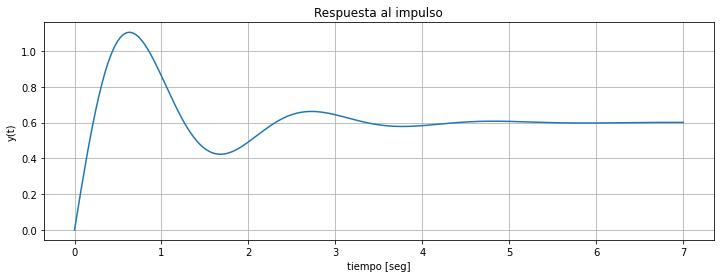

In [4]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(t,y)
ax.set_xlabel("tiempo [seg]")
ax.set_ylabel("y(t)")
ax.set_title('Respuesta al impulso')
ax.grid()

### Ejemplo 2: Uso incorrecto de este teorema

Obtener el valor final de la señal

$$Y(s)=\frac{3}{s(s-2)}$$

Aplicando el teorema ciegamente sin tener en cuenta sus hipótesis, tenemos:

$$y(\infty)=\left. sY(s) \right\rvert_{s=0}=-\frac{3}{2}$$

Sin embargo, podemos ver que:

$$y(t)=\left(-\frac{3}{2}+\frac{3}{2}e^{2t}\right)\mu(t)$$

La cual tiende a infinito si $t$ tiende a infinito. EL SISTEMA ES INESTABLE!

In [5]:
Y=ctrl.tf([3],[1,-2,0])
t,y=ctrl.impulse_response(Y,T=np.linspace(0,4,200))

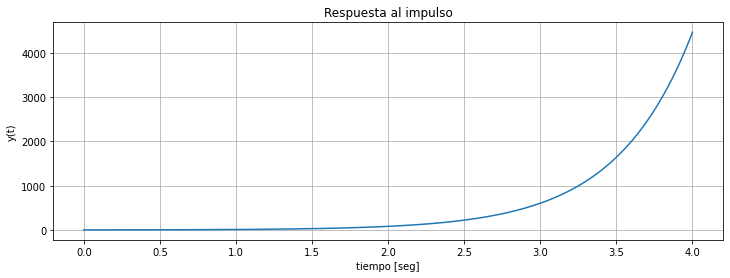

In [6]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(t,y)
ax.set_xlabel("tiempo [seg]")
ax.set_ylabel("y(t)")
ax.set_title('Respuesta al impulso')
ax.grid()

## Error de estado estacionario y sistema tipo

El error $e(t)$ de un sistema lo definido como la referencia menos la salida, es decir:

$$e(t)=r(t)-y(t)$$

o lo que es lo mismo, en el dominio de Laplace:

$$E(s)=R(s)-Y(s)$$

En la figura mostramos dos diagramas genéricos de bloques equivalentes, con la definición del error. Observemos del segundo diagrama de bloques, que si $H/I = 1, e(t) = a(t)$.

Dicho error tendrá un transitorio, y luego llegará a un estacionario al cual se lo denomina error de estado estacionario.

:::{figure-md}

<img src="fig4.gif" width=400px>

Diagrama genérico para errores en estado estacionario
:::

### Caso especial: Realimentación unitaria y constantes de error

Si $H = I$, podemos modelar el sistema con realimentación unitaria como muestra la siguiente figura.

:::{figure-md}

<img src="fig5.gif" width=300px>

Diagrama particular con $H(s)$=1 y $G(s) = I(s)D(s)G_p(s)$.
:::

Entonces tendremos:

$$F(s) = \dfrac{E(s)}{R(s)} = \dfrac{1}{1+G(s)}$$

Consideraremos a las entradas $r(t)$ polinómicas de la forma

$$r(t) = \dfrac{t^k}{k!} \text{ para } t>0$$

siendo su transformada de Laplace

$$R(s)=\dfrac{1}{s^{k+1}}$$

Se toma como base un sistema mecánico genérico como referencia para la nomenclatura, llamando para las entradas con $k=0$ entrada de posición, para $k=1$ entrada de velocidad, y para $k=2$ entrada de aceleración, sin tener en cuenta las unidades de la señal de entrada actual. Aplicando el teorema del valor final

$$
\begin{align}
\lim_{t\rightarrow \infty} e(t) & = e_{ss}= \lim_{s\rightarrow 0} sE(s)\\
& = \lim_{s\rightarrow 0} \frac{1}{1+G}R(s)\\
& = \lim_{s\rightarrow 0} s \frac{1}{1+G}\frac{1}{s^{k+1}}
\end{align}
$$

Consideremos primero un sistema para donde $G(s)$ no tiene polo en el origin, es decir no un ningún integrador en $G(s)$ y que se tiene una entrada escalón $R(s)=\dfrac{1}{s}$. De esta manera $r(t)$ es una entrada polinomial de grado 0. En este caso podemos escribir las ecuaciones anteriores:

$$
\begin{align}
e_{ss}  & = \lim_{s\rightarrow 0} s\frac{1}{1+G(s)}\frac{1}{s}\\
\dfrac{e_{ss}}{r_{ss}} & = \dfrac{e_{ss}}{1}=e_{ss} = \frac{1}{1+G(0)}
\end{align}
$$

donde $r_{ss} = \lim_{t\rightarrow \infty} =1 $.

Se define que este sistema es de **Tipo 0** y definimos la constante $G(0)\triangleq K_p$ que llamamos **constantes de error de posición**.

Notar que la ecuación anterior brinda **el error relativo**, es decir la relación entre el valor final del error y la y referencia.

Si la entrada fuera un polinomio mayor a 1, el error resultante crecería sin límites. Una **entrada polinómica de grado cero** es el grado más alto que un sistema de **Tipo 0** puede seguir con error fínito.

Si $G(s)$ tiene un polo en el origen, entonces podríamos continuar esta linea argumentativa y considerar un polinomio de orden 1 como entrada $r(s)$, que es directo evaluarlo directamente de manera general. Para este caso es necesario describir el comportamiento de la planta y el controlador cuando $s$ se aproxima a 0. Para este propósito agrupamos todos los términos excepto los polos en el origen de la función $G(s)$ en la función $G_0(s)$, de manera que podamos definir $G_0(0)=K_n$ y podemos escribir la función $G(s)$ como:

$$G(s) = \frac{G_0(s)}{s^n}$$

De estar forma, si por ejemplo $G(s)$ no tienen integradores, entonces $n=0$; si tiene 1 integrador entonces $n=1$, y así sucesivamente. Sustituyendo esto en la expresión del error:

$$
\begin{align}
e_{ss} & = \lim_{s\rightarrow 0 } s\frac{1}{1+\frac{G_0(s)}{s^n}}\frac{1}{s^{k+1}}\\
& = \lim_{s\rightarrow 0} \frac{s^n}{s^n+k_n}\frac{1}{s^k}
\end{align}
$$

Para esta ecuación podemos ver que si $n> k$ entonces $e =0$ y si $n<k$  entonces el error $e(t) \rightarrow \infty$.

Si $n = k = 0$ entonces $e_{ss} = \dfrac{1}{1+K_0}$ y si $n = k \neq 0$ entonces $e_{ss} = \frac{1}{K_n}$.

Como se dijo anteriormente si $n= k =0$, la entrada es una señal polinomial de orden 0 y la constante $K_p$ se llama constante de posición, se la escribe $K_p$ y el sistema se clásifica como sistema de **Tipo 0**.

Si $n=k=1$, la entrada es un polinomio de orden 1 y se conoce como rampa o entrada de velocidad, y la constante $K_1$ se la llama constante de velocidad y se escribe $K_v$. Este sistema se clasifica como sistema de **Tipo 1**. De manera similar podemos extendernos a sistemas de **Tipo 2** y mayores.

En la siguiente tabla mostramos los principales resultados de los visto hasta recién:

#### Errores en función del tipo de sistema

| Tipo de entrada | Escalón (posición) | Rampa (velocidad) | Parabola (aceleración) |
| :-: | :-: | :-: | :-: |
| Tipo 0 | $\frac{1}{1+K_p}$ | $\infty$ | $\infty$ |
| Tipo 1 | 0 | $\frac{1}{K_v}$ | $\infty$ |
| Tipo 2 | 0 | 0 | $\frac{1}{K_a}$ |

Podemos resumir entonces los calores de las constantes como:

$$
\begin{align}
K_p & = \lim_{s\rightarrow 0} G(s),& \qquad n = 0\\
 K_v & = \lim_{s\rightarrow 0} sG(s),& \qquad n = 1\\
 K_a & = \lim_{s\rightarrow 0} s^2G(s),& \qquad n = 2
\end{align}
$$

#### Ejemplo 1

Determine el tipo de sistema, la constante de error y el error que se obtendrá para las entradas de la tabla para el sistema realimentado donde se tiene un controlador proporcional $D(s) = k_p$ y una planta $G_p(s) = \frac{A}{\tau s +1}$.

**Solución**
Siguiendo la nomenclatura tenemos que:

$$G(s) = \frac{k_p A}{\tau s +1}$$

Podemos ver que este sistema no tiene polos en 0 por lo que $n=0$. Entonces el sistema es **Tipo 0**.

La constante de error es:

$$K_p = \lim_{s\rightarrow 0} \frac{k_p A}{\tau s +1} = k_p A $$

El error al escalón por lo tanto será:

$$e_{ss} = \frac{1}{1 + k_p A}$$

Mirando la tabla podemos ver que para entradas rampas y parabolas el error será $\infty$.

In [7]:
kp=1
A=2
tau = 5
G=ctrl.tf([kp*A],[tau,1])
t,y =ctrl.step_response(G)

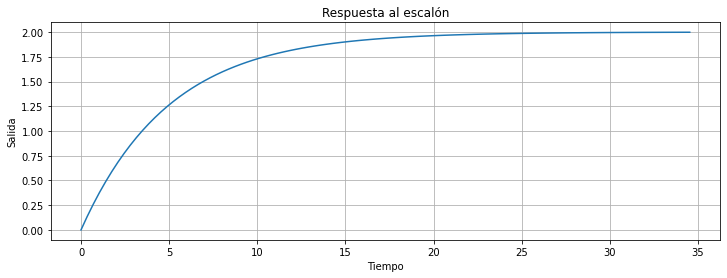

In [8]:
fig, ax= plt.subplots(figsize=(12,4))
ax.plot(t,y)
ax.set_xlabel('Tiempo')
ax.set_ylabel('Salida')
ax.set_title('Respuesta al escalón')
ax.grid()

Ahora veamos ahora la salida del sistema realimentado.

In [9]:
T=ctrl.feedback(G,1)

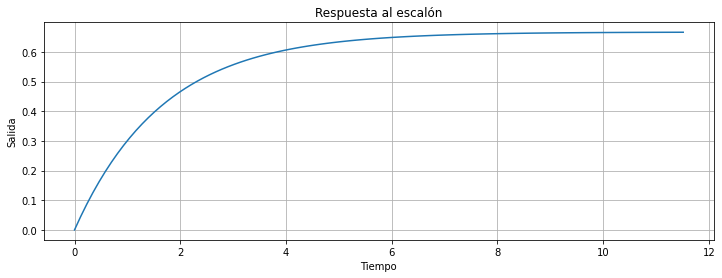

In [10]:
t,y =ctrl.step_response(T)
fig, ax= plt.subplots(figsize=(12,4))
ax.plot(t,y)
ax.set_xlabel('Tiempo')
ax.set_ylabel('Salida')
ax.set_title('Respuesta al escalón')
ax.grid()

Por último analicemos que pasa con el error del sistema realimentado:

In [11]:
Te = ctrl.feedback(1,G)
t,y =ctrl.step_response(Te)

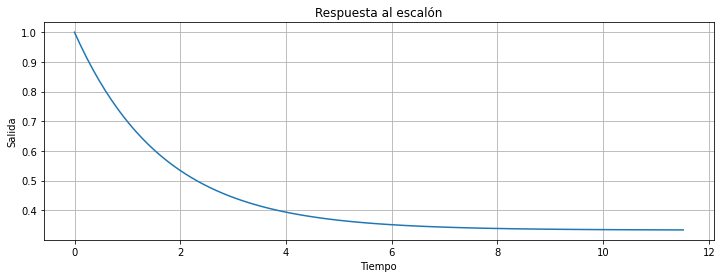

In [12]:
fig, ax= plt.subplots(figsize=(12,4))
ax.plot(t,y)
ax.set_xlabel('Tiempo')
ax.set_ylabel('Salida')
ax.set_title('Respuesta al escalón')
ax.grid()

### Ejemplo 2

Mismo que el caso anterior pero ahora el controlador es del tiempo integral, es decir que $D(s)=\dfrac{k_i}{s}$.

#### Solución ejemplo 2

Ahora tenemos que:

$$G(s)=\frac{k_i A }{s(\tau s +1)}$$

por lo tanto el sistema es de *Tipo 1* ya que $n=1$.

La constante tenemos definida la constante $K_v$

$$K_v = \lim_{s\rightarrow 0} \frac{s k_i A}{s(\tau s +1)} = k_i A$$

Error en estado estacionario al escalón será 0, mientras que a la rampa será:

$$\left.e_{ss}\right|_{r(t)=t} = \frac{1}{K_v} = \frac{1}{k_i A}$$

Para una entrada parabólica el error será $\infty$

In [13]:
ki=0.2
G=ctrl.tf([ki*A],[tau,1,0])
T=ctrl.feedback(G,1)
t,y =ctrl.step_response(T)

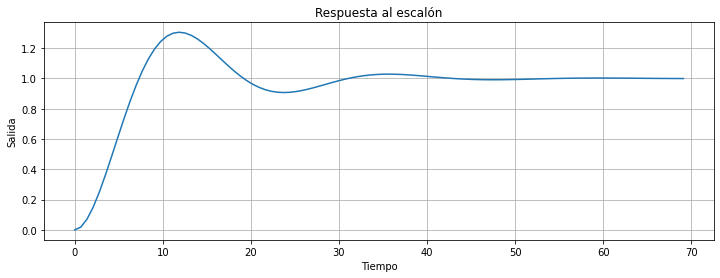

In [14]:
fig, ax= plt.subplots(figsize=(12,4))
ax.plot(t,y)
ax.set_xlabel('Tiempo')
ax.set_ylabel('Salida')
ax.set_title('Respuesta al escalón')
ax.grid()

Analicemos que pasa ahora con la respuesta del sistema a lazo cerrado frente una rampa. Como la herramienta que utilizamos no posee una rampa como entrada, lo que haremos es multiplicar al sistema por $\dfrac{1}{s}$. De esta forma obtendremos la respuesta a la rampa.

In [15]:
T_aux = ctrl.tf([1],[1,0])*T
t,y =ctrl.step_response(T_aux, T=np.linspace(0,50,1000))

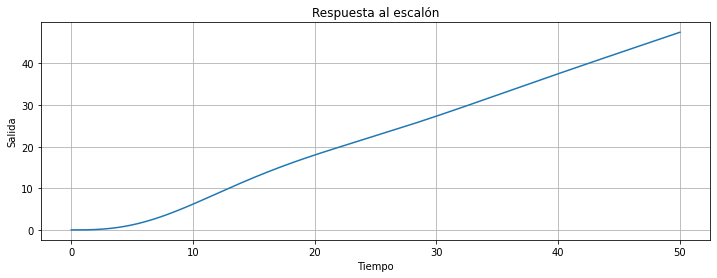

In [16]:
fig, ax= plt.subplots(figsize=(12,4))
ax.plot(t,y)
ax.set_xlabel('Tiempo')
ax.set_ylabel('Salida')
ax.set_title('Respuesta al escalón')
ax.grid()

Analicemos ahora la evolución del error frente a un escalón y frente a una rampa.

In [17]:
Te=ctrl.feedback(1,G)
tee,yee =ctrl.step_response(Te)  # error al escalón
ter,yer =ctrl.step_response(Te*ctrl.tf(1,[1,0])) # error a la rampa

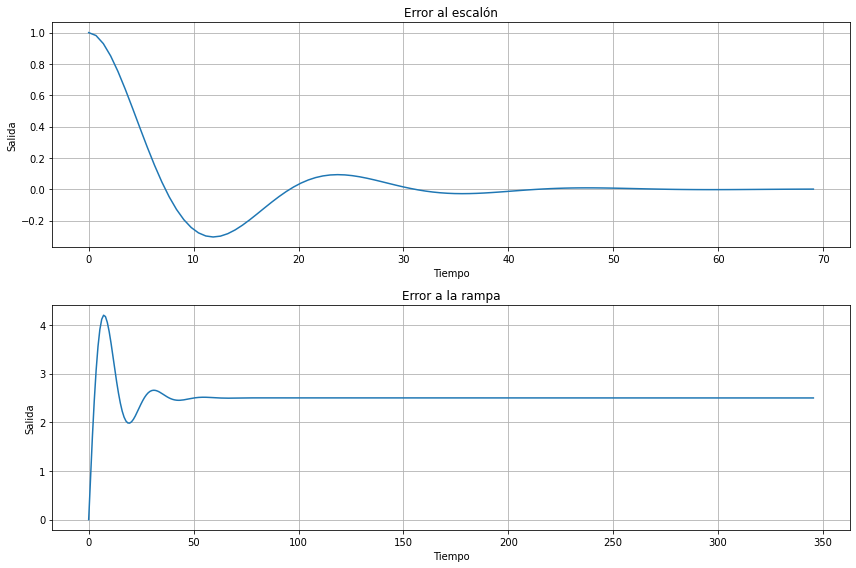

In [18]:
fig, ax= plt.subplots(2,1, figsize=(12,8))
ax[0].plot(tee,yee)
ax[0].set_xlabel('Tiempo')
ax[0].set_ylabel('Salida')
ax[0].set_title('Error al escalón')
ax[0].grid()
ax[1].plot(ter,yer)
ax[1].set_xlabel('Tiempo')
ax[1].set_ylabel('Salida')
ax[1].set_title('Error a la rampa')
ax[1].grid()
fig.tight_layout()

### Para solucionar en casa (fácil)

Realizar el mismo trabajo si el controlador fuese un PI (proporcional-integral), es decir

$$D(s) = k_p + \frac{k_i}{s}$$

## Tipo de sistema para la regulación y rechazo a las perturbaciones

Un sistema también puede ser clasificado según su habilidad para rechazar perturbaciones de forma polinómica de manera análoga al esquema de clasificación hecho para el seguimiento a referencias.

Supongamos ahora que tenemos un sistema de la forma que se ve en la siguiente figura (**notar el cambio de notación**):
:::{figure-md}

<img src="close_loop_with_disturbance.png" width=500px>

Sistema a lazo cerrado con perturbaciones
:::

Si queremos analizar como se comporta el error del sistema frente a una perturbación $W(s)$, vamos a pensar que la referencia $r(t)$ se mantiene en 0. Además para este curso no se va a tener en cuenta el ruido de medición $v(t)$. Así $V(s)=0$ y $R(s)=0$.

Por lo tanto, recordando que $E(s) = R(s)-Y(s)$.

Así tenemos que:

$$E(s)= -Y(s)$$

Nos interesa la función transferencia:

$$\frac{E(s)}{W(s)}=\frac{-Y(s)}{W(s)} = -\frac{G(s)}{1+G(s)D_{cl}} = T_w(s)$$

debido a que la entrada es igual a 0, la salida es el error (con el signo cambiado). De manera análoga que para las entradas referencias, se dice que el sistema es **Tipo 0** si para un perturbación escalón un sistema resulta con error constante distinto de 0 en estado estacionario; **Tipo 1** si para una rampa el error resulta constante distinto de 0 y así sucesivamente. En general, siguiendo el mismo enfoque usando para las entradas referencias, asumimos que una constante $n$ y una función $T_{o,w}(s)$ puede ser definida con las propiedades que:

* $T_{o,w}(0) = \dfrac{1}{K_{n,w}}$

* $T_w(s) = s^nT_{o,w}(s)$

Entonces el error en estado estacionario a una entrada perturbación que sea polinomial de grado $k$ es:

$$
\begin{align}
y_{ss} & = \lim_{s\rightarrow 0 } \left[ sT_w(s)\frac{1}{s^{k+1}}\right]\\
& = \lim_{s\rightarrow 0} \left[ T_{o,w}(s)\frac{s^n}{s^{k}}\right]
\end{align}
$$

De acá tenemos que se $n>k$ el error es 0 y si $n<k$ el error no es acotado. Si $n = k$ el sistema es de tipo $k$ y el error es dado por $\dfrac{1}{K_{n,w}}$.

### Ejemplo 3: Tipo de sistema para un motor de corriente continua con control de posición

Considerar el modelo simplificado del motor de corriente continua con realimentacion unitaria como se muestra en la figura:

:::{figure-md}
<img src="motor_dc_simplified.png" width=600px>

Motor simplificado a lazo cerrado con perturbaciones
:::

Analizar el tipo de sistema para las referencias $R(s)$ y para las perturbaciones $W(w)$ para el sistema de la figura anterior. Suponiendo que $A$ y $B$ son constantes y que:

1. $Dc(s) = k_p$
1. $Dc(s) = k_p + \dfrac{k_i}{s}$

La función transferencia de la planta $G(s)$ es:

$$G(s)=\frac{A}{s(\tau s + 1)}$$

**Solución**
Para el caso donde $D_c(s)=k_p$.

**Primero analizamos el sistema para los cambios en la referencia.**

Tenemos $G_0(s)= D_c(s)G(s) = k_p \dfrac{A}{s(\tau s + 1)}$.

Vemos que el sistema tiene un polo en 0 por lo que $n=1$. Por lo tanto, para el seguimiento a referencia tenemos que el sistema es **Tipo 1**, y que tenemos que $K_v$ es igual a

$$K_v=\lim_{s\rightarrow 0}s  \dfrac{k_pA}{s(\tau s + 1)} = k_p A$$

y el error sería:

$$e_{ss}=\frac{1}{K_v}=\frac{1}{k_pA}$$

**Analicemos ahora el caso 1 para el rechazo a perturbaciones.**

Podemos ver que si hacemos $R(s)=0$ tenemos que:

$$
\begin{align}
T_w(s) & = \dfrac{B}{A} \dfrac{\dfrac{A}{s(\tau s +1)}}{1+\dfrac{A}{s(\tau s +1)}k_p}= \dfrac{B}{s(\tau s+1)+Ak_p}\\
& = s^0 T_{0,w},\\
n & = 0,\\
K_{0, w} & = -\dfrac{Ak_p}{B}\\
\end{align}
$$

Entonces para rechazo a perturbaciones el sistema sería **Tipo 0**, y el error será:

$$e_{ss} = -\frac{B}{Ak_p}$$

Ahora empecemos con el **caso 2**.

**Primero analizamos el sistema para los cambios en la referencia.**

Tenemos

$$G_0(s)= D_c(s)G(s) = \left(k_p + \dfrac{k_i}{s}\right) \dfrac{A}{s(\tau s + 1)} = \dfrac{sk_p + k_i}{s} \dfrac{A}{s(\tau s + 1)} = \dfrac{A(sk_p + k_i)}{s^2(\tau s + 1)}$$

Vemos que el sistema tiene dos polos en 0 por lo que $n=2$. Por lo tanto, para el seguimiento a referencia tenemos que el sistema es **Tipo 2**, y que tenemos que $K_a$ es igual a

$$K_a=\lim_{s^2\rightarrow 0}s^2  \dfrac{(sk_p+k_i)A}{s^2(\tau s + 1)} = k_i A$$

y el error sería:

$$e_{ss}=\frac{1}{K_a}=\frac{1}{k_iA}$$

**Para rechazo a perturbaciones sería:**

$$
\begin{align}
T_w(s) & = \dfrac{B}{A} \dfrac{\dfrac{A}{s(\tau s +1)}}{1+\dfrac{A}{s(\tau s +1)}\left(k_p + \dfrac{k_i}{s}\right)}\\
 & = \dfrac{B}{s(\tau s+1)+A\left(\dfrac{k_p + k_is}{s}\right)}\\
 & = \dfrac{Bs}{s^2(\tau s +1) + (k_ps+k_i)A }\\
& = s^1 T_{1,w},\\
n & = 1,\\
K_{1, w} & = -\frac{Ak_I}{B}\\
\end{align}
$$

Entonces para rechazo a perturbaciones es **Tipo 1**, y el error de estado estacionario a la rampa resulta:

$$e_{ss} = - \frac{B}{Ak_i}$$